# Tarea 1 - EYP3407
### Profesor: Mauricio Castro
### Por: Javiera Valenzuela Soto y Francisca Vilca Sánchez

In [1]:
# Librerías a usar

#%pip install scipy

import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Entropía
Sea $Z$ una variable aleatoria con función de densidad dada por

$$f(z |\mu ,\sigma^2,\alpha) = \frac{2}{\sigma}\phi(\frac{z − \mu}{\sigma})\Phi(\alpha(\frac{z − \mu}{\sigma})),z \in \mathbb{R},$$

donde $\phi(·)$ y $\Phi(·)$ representan la función de densidad y la función distribución, respectivamente, de una variable aleatoria normal estándar. La notación utilizada para referirnos a la distribución de $Z$ seŕa $Z ∼ SN(\mu,\sigma^2,\alpha)$. Note que cuando $\alpha = 0, Z ∼ N(\mu,\sigma^2)$. Muestre
que la entropía $H_{SN}(\mu,\sigma^2,\alpha)$ de $Z$, está dada por 

$$H_{SN}(\mu,\sigma^2,\alpha) = H_{N}(\mu,\sigma^2) − E_{X_0} [ln (2\Phi(\alpha X_0))] ,$$

donde $X_0 ∼ SN(\alpha)$ y $H_{N(\mu,\sigma^2)}$ es la entropía cuando $Z ∼ N(\mu,\sigma^2)$. Grafique la entropía $H_{SN}(\mu=0,\sigma^2=1,\alpha)$ para diferentes una grilla de valores de α entre $−20$ y $20$. ¿Qué puede concluir de lo anterior?

## Solución:

Para comprobar que la Entropía de una Skew-normal (SN) se puede reescribir en términos de la Entropía de una Normal más la Esperanza de una variable aleatoria SN con $\mu = 0 $ y $ \sigma^2 = 1$, para ello nos guiaremos del árticulo "*Shannon Entropy and mutual information for multivariate Skew-Elliptical distributions*". Usando el Lema 1, de dicho árticulo es posible comprobar que la Entropía de una va $Z ~ N(\mu,\sigma^2) $ se puede reescribir como:

\begin{align*}
H(Z) &= -E(log(f(Z))) \\
&= -E(log ( \frac{1}{\sqrt{2\pi\sigma^2}} exp\{ \frac{1}{2}(\frac{x-\mu}{\sigma^2})^2 \} ) ) \\
&= -E(log(\sigma^{-1})) - E( (log(f(Z_0))) ) \\
&= log(\sigma) - H(Z_0)
\end{align*}

Donde $Z_0 \sim N(0,1)$, con este Lema y usando la definición de Entropía se puede obtener:

\begin{align*}
H(Z) &= -E(log(f(Z))) \\
&= log(\sigma) - H(X_0) \\
&= log(\sigma) - E(log(2\phi(X_0)\Phi(\alpha X_0)))\\
&= log(\sigma) - E(log(\phi(X_0))) - E(log(2\Phi(\alpha X_0)))\\
&= H(Z) - E( log(2 \Phi (\alpha X_0)) )
\end{align*}

Con el procedimiento anterior se muestra el resultado pedido, ahora para revisar que ocurre con la Entropía de una Skew-Normal se usará la librería `spicy.stats` para calcular la Entropía de las diferentes distribuciones tal como se muestra a continuación en el siguiente código:

In [2]:
# Definimos los parámetros de la distribución skew-normal como mu = 0 y sigma2 = 1
# Pero para alpha sera un vector con distintos valores

alpha = np.linspace(-20,20,1000) # Parámetro de sesgo
media = 0  # Media
sigma2 = 1  # Desviación estándar

entropy_SKN = list()
entropy_N = list()

# Crearemos 100 distribuciones skew-normal
for i in range(len(alpha)):
    skew_normal_dist = stats.skewnorm(alpha[i],loc= media,scale= sigma2)
    normal_dist = stats.norm(0, 1)
    entropy_N.append(normal_dist.entropy())
    entropy_SKN.append(skew_normal_dist.entropy())


In [3]:
data = {"alphas": alpha,"entropia_SKN": entropy_SKN,"entropia_N": entropy_N}

df = pd.DataFrame(data)
df.head()

,alphas,entropia_SKN,entropia_N
0,-20.00000,0.761775,1.418939
1,-19.95996,0.761847,1.418939
2,-19.91992,0.761920,1.418939
3,-19.87988,0.761992,1.418939
4,-19.83984,0.762065,1.418939


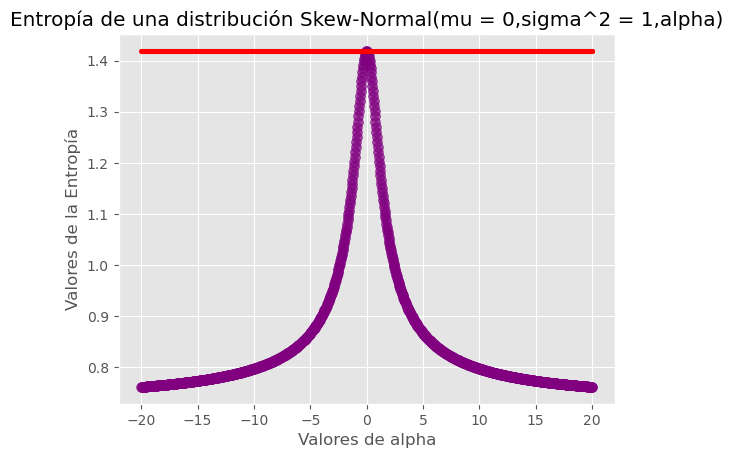

In [4]:
plt.style.use("ggplot")
df.plot(x = "alphas", y = "entropia_SKN", kind="scatter",color="purple",s=50, alpha = 0.7)
plt.xlabel("Valores de alpha")
plt.ylabel("Valores de la Entropía")
plt.title("Entropía de una distribución Skew-Normal(mu = 0,sigma^2 = 1,alpha)")
plt.scatter(alpha,entropy_N, label='Nuevos', color='red',s=10, alpha = 0.9)


El parámetro de sesgo $\alpha$ de una distribución Skew-Normal controla la asimetría de la distribución. Al cambiar el valor de $\alpha$ tendrá un efecto en la forma de la distribución Skew-Normal, y por consiguinte, afectará la entropía de la distribución.

En este caso, lo que se hizó fue generar 1000 puntos en el intervalo -20 y 20, es bastante claro notar que a medida que se acerca a 0 tanto por la derecha o la izquierda la entropía se asemeja a la entropía de una Normal Estándar.

Ahora bien, el tener un valor $|\alpha|> 5$ aproximadamente, es bastante útil, ya que la entropía es bastante baja por lo que hay mayor información de los eventos, disminuyendo de la misma manera la incertidumbre.

## 2) Sistemas de Recomendación a usar

### (a) Descripción y objetivo del problema

La dataset utilizada contiene la información sobre las preferencias y calificaciones de 73516 usuarios en 12294 animes categorizados según su género y tipo de anime...(bla bla bla). El objetivo de este trabajo consiste en realizar un sistema de recomendación del próximo anime para ver de posible interés en base a las calificaciones entregadas por cada usuario.

#### Análisis Exploratorio de los datos

##### Limpieza de los datos

Para comenzar, se realizó una limpieza inicial en los datos, para realizar el sistema de recomendación. Inicialmente

In [5]:
data = pd.read_csv("anime.csv")
display(data.head())
print("Dimensiones:", data.shape)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Dimensiones: (12294, 7)


Procedemos a separar la columna de género por comas, para así tener la caracterización completa de cada anime. 

In [6]:
genre= data["genre"].str.split(',', expand=True)
data = pd.concat([data, genre], axis=1)
data.columns
data.rename(columns={0:'genero_1', 1:'genero_2', 2:'genero_3', 3:'genero_4', 
4:'genero_5', 5:'genero_6',6:'genero_7',7:'genero_8',8:'genero_9',9:'genero_10',
10:'genero_11',11:'genero_12',12:'genero_13'}, inplace=True)
data.drop(['genre'], axis=1, inplace=True)
data

,anime_id,name,type,episodes,rating,members,genero_1,genero_2,genero_3,genero_4,genero_5,genero_6,genero_7,genero_8,genero_9,genero_10,genero_11,genero_12,genero_13
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,Drama,Romance,School,Supernatural,None,None,None,None,None,None,None,None,None
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None
2,28977,Gintama°,TV,51,9.25,114262,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,9253,Steins;Gate,TV,24,9.17,673572,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,9969,Gintama&#039;,TV,51,9.16,151266,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,OVA,1,4.15,211,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12290,5543,Under World,OVA,1,4.28,183,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12291,5621,Violence Gekiga David no Hoshi,OVA,4,4.88,219,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,OVA,1,4.98,175,Hentai,None,None,None,None,None,None,None,None,None,None,None,None


In [7]:
data.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

,type
type,
Movie,2348
Music,488
ONA,659
OVA,3311
Special,1676
TV,3787


Text(0.5, 1.0, 'Televidentes según tipo de Anime')

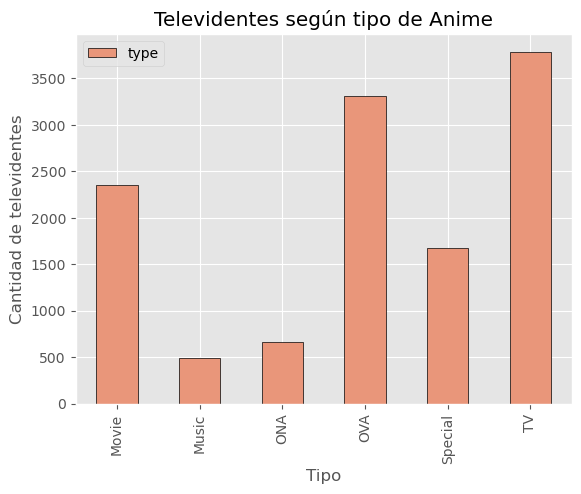

In [8]:
data_barplot = data.groupby(["type"]).agg({"type": "count"})
display(data_barplot)


data_barplot.plot(kind="bar", color="#E9967A", edgecolor='black')

plt.xlabel('Tipo')
plt.ylabel('Cantidad de televidentes')
plt.title('Televidentes según tipo de Anime')


Para la recomendación, nos centraremos en los tipos de anime que pertenezcan a la clasificación de "TV", "Especial" y "OVA", ya que son los elementos más similares entre sí y que pueden tener una continuación en la trama presentada por el anime. En cambio, las películas poseen una mayor duración y (bla bla bla)

In [9]:
data.query('type == "TV" or type == "OVA" or type== "Special"', inplace=True)


Se procedió a eliminar los valores faltantes de la columna rating ya que necesitamos esos datos para poder realizar la recomendación. Además, la cantidad total resultante no varió demasiado, si es que lo comparamos con la primera cantidad (poner bla bla más bonito)

In [10]:
# Eliminamos los valores nulos de la columna rating
data.dropna(subset=['rating'], inplace= True)
# Se procede a realizar un histograma para asi ver como realizaremos la ponderación
# de los ratings para el sistema de recomendación

In [11]:
data.episodes.unique()
data['episodes'].replace("Unknown", "emision", inplace=True)
data.episodes.unique()


array(['64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '1',
       '99', 'emision', '39', '101', '47', '50', '62', '33', '112', '23',
       '3', '94', '6', '8', '14', '7', '40', '15', '203', '77', '291',
       '120', '102', '96', '38', '79', '175', '103', '70', '153', '45',
       '5', '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '9', '49', '366', '97', '78', '358',
       '155', '20', '104', '113', '48', '54', '167', '161', '42', '142',
       '31', '373', '220', '46', '195', '17', '1787', '73', '147', '127',
       '16', '19', '98', '150', '76', '53', '124', '29', '115', '224',
       '44', '58', '93', '154', '92', '67', '172', '86', '30', '276',
       '59', '72', '330', '41', '105', '128', '137', '56', '55', '65',
       '243', '193', '18', '191', '180', '91', '192', '66', '182', '32',
       '164', '100', '296', '694', '95', '68', '117', '151', '130',

Text(0.5, 1.0, 'Histograma de Rating - Anime')

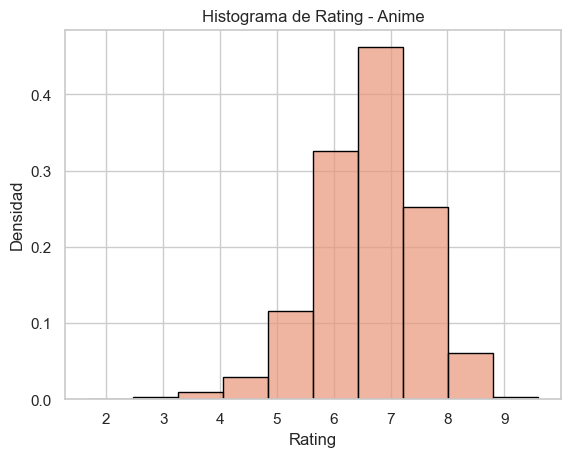

In [12]:
sns.set(style="whitegrid")  # Establece un estilo de fondo
sns.histplot(data=data, x="rating", bins=10, color='#E9967A', edgecolor='black', alpha=0.7, stat="density")
# Personalizar el aspecto del histograma
plt.xlabel('Rating')
plt.ylabel('Densidad')
plt.title('Histograma de Rating - Anime')


Vamos a contar los valores que son menores de 3, para ver la cantidad existente y decidir si eliminarlos o no


In [13]:
# Definir condiciones
condicion1 = (data["rating"] <3)
condicion2 = (data["rating"] >= 3)
titulo= ">=3"
titulo2= "<3"
tabla = {
    f'Animes con rating {titulo2}': sum(condicion1),
    f'Animes con rating {titulo}': sum(condicion2)
}

# Procedemos a agrupar según esas variables
tablita = pd.DataFrame(list(tabla.items()), columns=['', 'Recuento'])
print(tablita)


                          Recuento
0   Animes con rating <3        13
1  Animes con rating >=3      8614


Text(0.5, 1.0, 'Histograma de Rating - Anime')

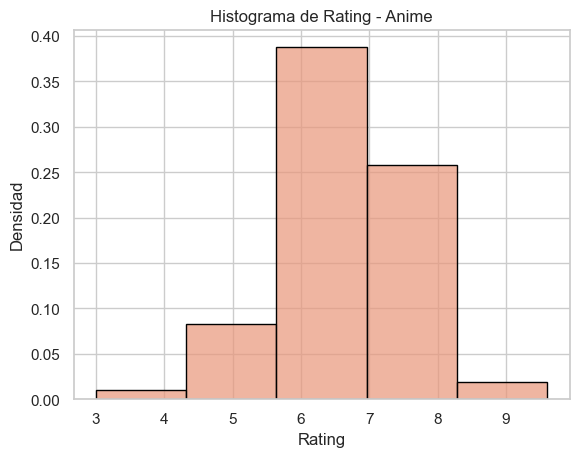

In [14]:
data.query('rating >= 3', inplace=True)
# Volvemos a graficar
sns.set(style="whitegrid")  # Establece un estilo de fondo
sns.histplot(data=data, x="rating", bins=5, color='#E9967A', edgecolor='black', alpha=0.7, stat="density")
# Personalizar el aspecto del histograma
plt.xlabel('Rating')
plt.ylabel('Densidad')
plt.title('Histograma de Rating - Anime')


In [15]:
df_melted = data.melt(id_vars=["anime_id", "name", "type", "episodes", "rating", "members"],
                    value_vars=["genero_1", "genero_2", "genero_3", "genero_4", "genero_5",
                                "genero_6", "genero_7", "genero_8", "genero_9", "genero_10",
                                "genero_11", "genero_12", "genero_13"],
                    value_name="genero")
df_melted = df_melted.dropna(subset=["genero"])
df_melted["genero"] = df_melted["genero"].str.lstrip()
df_melted

,anime_id,name,type,episodes,rating,members,variable,genero
0,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,genero_1,Action
1,28977,Gintama°,TV,51,9.25,114262,genero_1,Action
2,9253,Steins;Gate,TV,24,9.17,673572,genero_1,Sci-Fi
3,9969,Gintama&#039;,TV,51,9.16,151266,genero_1,Action
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,TV,10,9.15,93351,genero_1,Comedy
...,...,...,...,...,...,...,...,...
83915,29527,Kagee Mukashibanashi,TV,65,7.50,87,genero_10,Supernatural
88714,2832,Ani*Kuri15,Special,15,7.02,12926,genero_11,Slice of Life
90774,231,Asagiri no Miko,TV,26,6.31,4721,genero_11,Supernatural
97328,2832,Ani*Kuri15,Special,15,7.02,12926,genero_12,Super Power


In [16]:
resumen_std_ratings = df_melted.groupby("genero")["rating"].std().reset_index()
print(resumen_std_ratings)


           genero    rating
0          Action  0.809316
1       Adventure  0.784155
2            Cars  1.008995
3          Comedy  0.885488
4        Dementia  1.069203
5          Demons  0.950062
6           Drama  0.846348
7           Ecchi  0.695301
8         Fantasy  0.825863
9            Game  0.815405
10          Harem  0.602353
11         Hentai  0.684836
12     Historical  0.884023
13         Horror  0.923566
14          Josei  0.782419
15           Kids  0.931932
16          Magic  0.764411
17   Martial Arts  0.780047
18          Mecha  0.746769
19       Military  0.783078
20          Music  0.984163
21        Mystery  0.826347
22         Parody  0.976043
23         Police  0.731420
24  Psychological  1.030515
25        Romance  0.737974
26        Samurai  0.961512
27         School  0.748927
28         Sci-Fi  0.768996
29         Seinen  0.854156
30         Shoujo  0.806529
31      Shoujo Ai  0.741787
32        Shounen  0.729509
33     Shounen Ai  0.825469
34  Slice of Life  0

(0.0, 1.2)

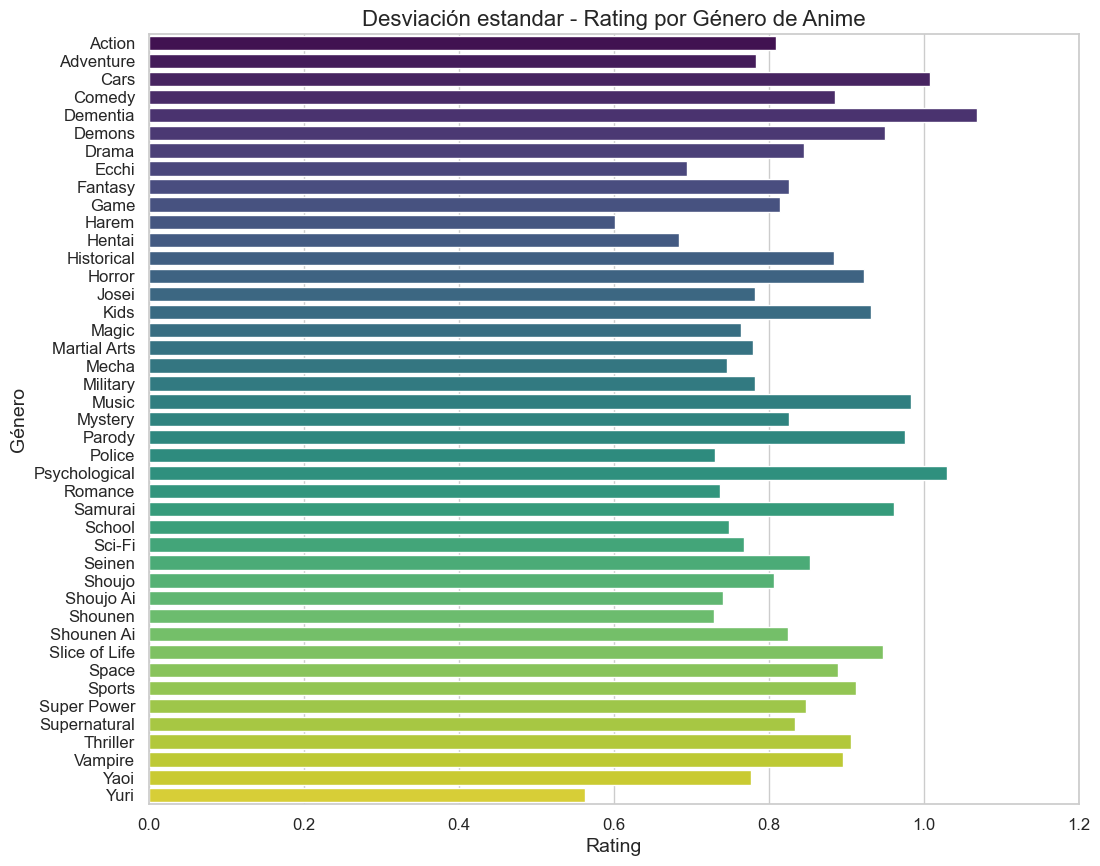

In [17]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")
sns.barplot(x="rating", y="genero", data=resumen_std_ratings, palette="viridis")

# Personalizar el gráfico
plt.title('Desviación estandar - Rating por Género de Anime', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 1.2)

In [18]:
resumen_promedio_ratings = df_melted.groupby("genero")["rating"].mean().reset_index()
print(resumen_promedio_ratings)

           genero    rating
0          Action  6.870406
1       Adventure  6.799969
2            Cars  6.637885
3          Comedy  6.744376
4        Dementia  6.212727
5          Demons  6.761229
6           Drama  7.011547
7           Ecchi  6.668832
8         Fantasy  6.761277
9            Game  6.837007
10          Harem  6.969136
11         Hentai  6.192426
12     Historical  6.880801
13         Horror  6.595589
14          Josei  7.421400
15           Kids  6.232639
16          Magic  6.832343
17   Martial Arts  6.891626
18          Mecha  6.724268
19       Military  7.033232
20          Music  6.671212
21        Mystery  7.189271
22         Parody  6.630694
23         Police  6.994892
24  Psychological  7.175270
25        Romance  7.010000
26        Samurai  6.980991
27         School  7.009378
28         Sci-Fi  6.764739
29         Seinen  6.970175
30         Shoujo  6.888458
31      Shoujo Ai  6.993265
32        Shounen  7.119352
33     Shounen Ai  6.915536
34  Slice of Life  6

(0.0, 8.0)

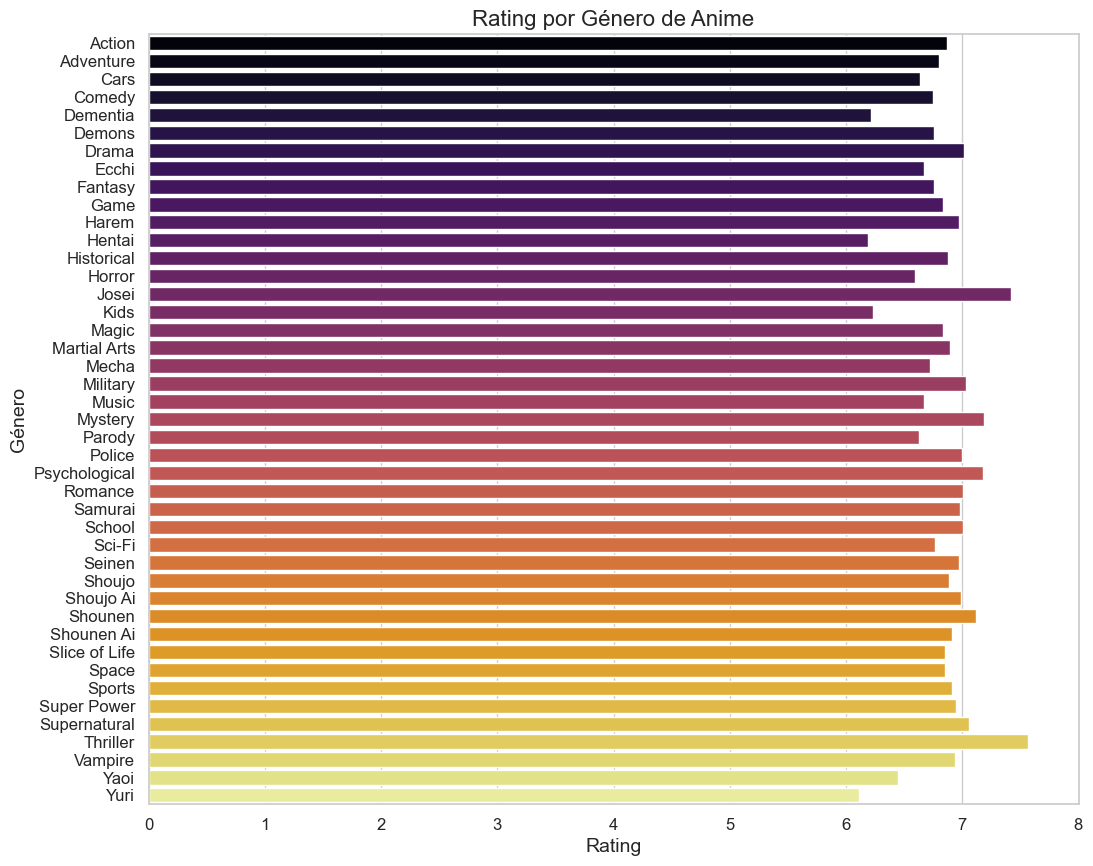

In [19]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")
sns.barplot(x="rating", y="genero", data=resumen_promedio_ratings, palette="inferno")

# Personalizar el gráfico
plt.title('Rating por Género de Anime', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)

Text(0, 0.5, 'Rating Promedio')

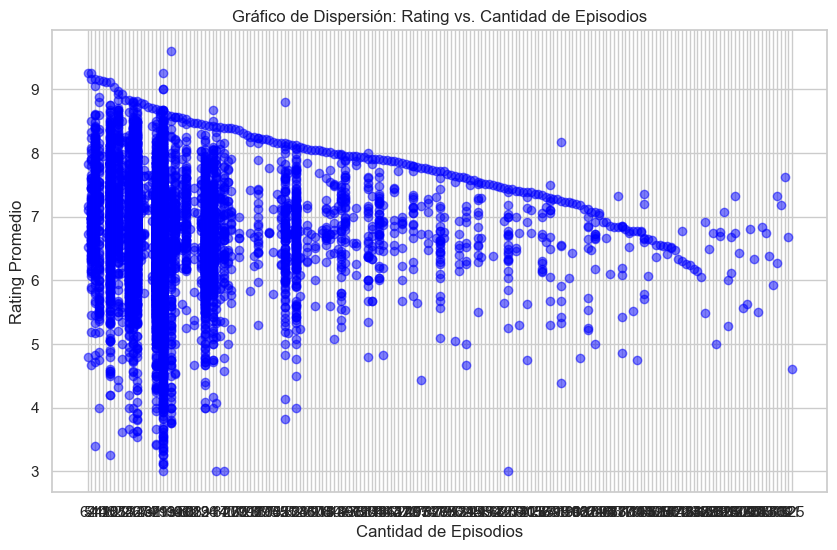

In [20]:
episodios = data.sort_values(by="episodes")
sorted(data.episodes.unique())
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(data["episodes"], data["rating"], alpha=0.5, color='blue')

# Configurar el título y etiquetas de los ejes
plt.title('Gráfico de Dispersión: Rating vs. Cantidad de Episodios')
plt.xlabel('Cantidad de Episodios')
plt.ylabel('Rating Promedio')

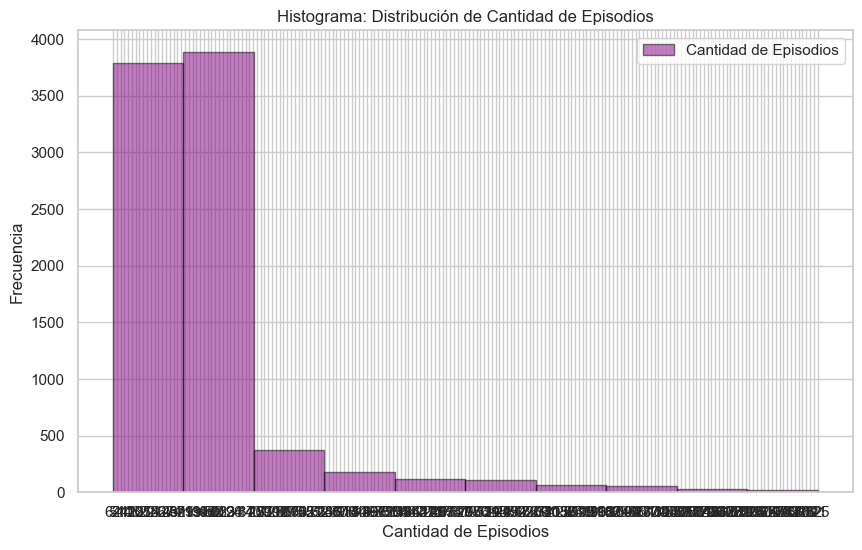

In [21]:
plt.figure(figsize=(10, 6))

# Crear un histograma de la cantidad de episodios
plt.hist(data["episodes"], bins=10, alpha=0.5, color='purple', edgecolor='black', label='Cantidad de Episodios')

# Configurar el título y etiquetas de los ejes
plt.title('Histograma: Distribución de Cantidad de Episodios')
plt.xlabel('Cantidad de Episodios')
plt.ylabel('Frecuencia')
plt.legend()


(0.0, 8.0)

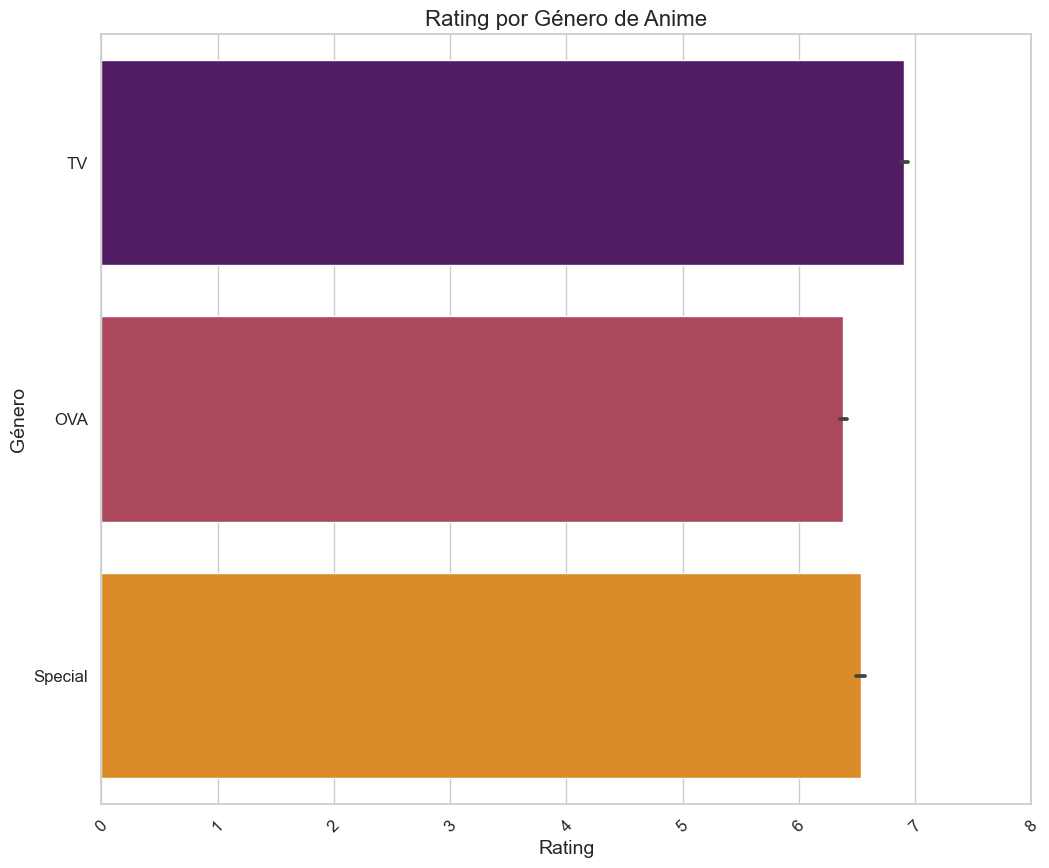

In [22]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")
sns.barplot(x="rating", y="type", data=data, palette="inferno")


# Personalizar el gráfico
plt.title('Rating por Género de Anime', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.xticks(fontsize=12, rotation= 45)
plt.yticks(fontsize=12)
plt.xlim(0, 8)

#### (c) Descripción del método utilizado

#### (d) Implementación computacional

In [54]:
scale_ratings = []
for rating in df_melted["rating"]:
    if 3 <= rating < 4:
        scale_ratings.append(3)
    elif 4 <= rating < 5:
        scale_ratings.append(4)
    elif 5 <= rating < 6:
        scale_ratings.append(5)
    elif 6 <= rating < 7:
        scale_ratings.append(6)
    elif 7 <= rating < 8:
        scale_ratings.append(7)
    elif 8 <= rating < 9:
        scale_ratings.append(8)
    else:
        scale_ratings.append(9)


In [68]:
# crear base para la implementacion del método
df_melted["scale_ratings"] = scale_ratings
rating_obs = df_melted[['anime_id', 'genero', 'rating']]

In [69]:
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader

train, test = train_test_split(rating_obs, test_size = 0.05, random_state=15)
reader = Reader(rating_scale=(3,9))
data_train= Dataset.load_from_df(df=train,reader=reader)
data_train.raw_ratings[:10]

[(13299, 'School', 5.91, None),
 (31883, 'Seinen', 6.46, None),
 (1039, 'Drama', 6.57, None),
 (17979, 'Kids', 4.88, None),
 (29857, 'Drama', 4.52, None),
 (2800, 'Shoujo', 7.58, None),
 (17513, 'Shoujo', 5.81, None),
 (2741, 'Action', 7.13, None),
 (19583, 'Parody', 5.13, None),
 (189, 'Slice of Life', 7.28, None)]

In [86]:
import surprise.prediction_algorithms.knns as knns
sim_options = {"name": "cosine","user_based": True}

model_knn= knns.KNNWithZScore(sim_options=sim_options, verbose=False)
model_knn.fit(data_train.build_full_trainset())

MemoryError: Unable to allocate 554. MiB for an array with shape (8522, 8522) and data type float64

In [82]:
model_knn.kneighbors()

AttributeError: 'KNNWithZScore' object has no attribute 'kneighbors'

In [85]:
#users_sim = pd.DataFrame(
#    data = model_knn.sim,
#    index = df_melted.columns[1:],
#    columns = df_melted.columns[1:]
#)

In [72]:
len(users_sim[5000].sort_values(ascending=False))

8522

#### (e) Resultados obtenidos

#### (f) Medida de performance

### Preguntas a Contestar:

#### (a) ¿Cuál es en su opinión el mejor sistema de recomendación? Discutir
#### (b) ¿Los métodos considerados son escalables? Comente

## Bibliografía

[1] Arellano-Valle, R. B., Contreras-Reyes, J. E., & Genton, M. G. (2012). Shannon Entropy and mutual information for multivariate Skew-Elliptical distributions. *Scandinavian Journal of Statistics*, 40(1), 42-62. https://doi.org/10.1111/j.1467-9469.2011.00774.x